In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
wine=load_wine()

In [ ]:
wine.keys()

In [ ]:
wine.target_names
wine_target = wine.target[:130]


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_data = torch.arange(1, 6, dtype=torch.float32)
y_data = x_data * 2

x = x_data.view(5, 1)
y = y_data.view(5, 1)
print("x :", x_data)
print("y :", y_data)

In [ ]:
model = nn.Linear(1, 1, bias = False)
model.weight

In [ ]:
loss = nn.MSELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.01) 

## 신경망을 구성하기 위한 값:tensor(벡터,행렬,스칼라 다 됨)에 저장을 하겟다=backward를 하겠다,모든 grad를 자동 계산=텐서의 모든 연산을 추적~역산~
## requires_grad=True 텐서의 모든 연산에 대해 추적함당
# tensor=값 grad= 백워드 하기 전 연산 기억해놓은 거

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(wine, wine_target, target, test_size=.2)
train_x=torch.from_numpy(train_x).float()

In [12]:
import torch

# from torch.autograd import Variable  # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
mnist = datasets.fetch_openml(name='mnist_784', data_home='./data/')

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist.data=mnist.data/225

In [4]:
pd.DataFrame(mnist.data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


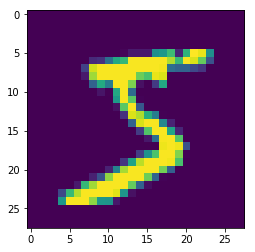

In [5]:
plt.imshow(mnist.data[0].reshape(28,28))

In [6]:
mnist_label=mnist.target

In [7]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(
    mnist.data, mnist_label, train_size=5000, test_size=500
)

In [8]:
import numpy as np

In [9]:
train_X=torch.from_numpy(train_X).float()
train_y=torch.from_numpy(train_y.astype(np.int)).long()
test_X=torch.from_numpy(test_X).float()
test_y=torch.from_numpy(test_y.astype(np.int)).long()


In [10]:
train = TensorDataset(train_X, train_y)
train_loader = DataLoader(train, batch_size=100, shuffle=True)
#배치

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(784,256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)

In [15]:
model = Net()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
crit=nn.CrossEntropyLoss()

for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # grad 초기화
        optimizer.zero_grad()
        
        # Forward - 순전파
        output = model(train_x)
        
        loss = crit(output, train_y)
        
        loss.backward()
        
        # 가중치 업데이트
        optimizer.step()
        
        # 오차 계산
        total_loss += loss.item()
        
    if (epoch +1) % 100 == 0:
        print(epoch+1, total_loss)

100 38.76902788877487
200 4.230603516101837
300 0.6850584051571786
400 0.2754557393491268
500 0.1422683234559372
600 0.11876102146925405
700 0.07227276603225619
800 0.08631696637894493
900 0.11379905662033707
1000 0.039043888267769944


In [21]:
torch.exp(model(test_X))[1]

tensor([8.4013e-16, 5.0904e-18, 3.3540e-17, 2.1744e-24, 3.2136e-09, 4.5090e-27,
        1.7663e-18, 4.9211e-14, 4.9165e-13, 7.9557e-04],
       grad_fn=<SelectBackward>)

In [23]:
import os
import requests
import tarfile
url = 'http://kristalinfo.com/download/hkib-20000-40075.tar.gz'
filename = './data/hkib/hkib-20000-40075.tar.gz'
base_dir = os.path.dirname(filename)

In [24]:
requests.get(url,stream=True) as resp:

SyntaxError: invalid syntax (<ipython-input-24-fe540b3bfcb1>, line 1)

In [35]:
data=pd.read_csv('C:\\Users\\datasets\\weather(2).csv',encoding="cp949")

In [42]:
data.head()
temp=data['평균기온(°C)']
train_x=np.array(temp[:1461])
test_x=np.array(temp[1461:])

In [51]:
optimizer =optim.Adam(model.parameters(),lr=0.001)

In [52]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [59]:
mnist = datasets.fetch_openml(name='mnist_784', data_home='.\\data\\')

In [54]:
mnist_data = mnist.data / 255


In [65]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn import datasets,model_selection

In [122]:
dirs=['ants','bees']

In [192]:
data=[]
label=[]
for i,d in enumerate(dirs):
    files=os.listdir('C:\\Users\\datasets\\hymenoptera_data\\hymenoptera_data\\'+d)

In [193]:
for i in files:
    img=Image.open('C:\\Users\\datasets\\hymenoptera_data\\hymenoptera_data\\'+d+'\\'+i,'r')
    resize_img = img.resize((128, 128))
    r,g,b = resize_img.split()
    r_resize_img = np.asarray(np.float32(r)/255.0)
    g_resize_img = np.asarray(np.float32(g)/255.0)
    b_resize_img = np.asarray(np.float32(b)/255.0)
    rgb_resize_img = np.asarray([r_resize_img, g_resize_img, b_resize_img])
    data.append(rgb_resize_img)
    
label.append(f)    

In [194]:
pd.DataFrame(data[0][0])
label

['0013035.jpg']

In [197]:
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

TypeError: float() argument must be a string or a number, not 'list'

In [196]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(
    data, label, test_size=0.1)

ValueError: Found input variables with inconsistent numbers of samples: [204, 1]